In [1]:
#importing alll the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


# 1. DATA PREPARATION STAGE (FEATURE SCALING)

In [2]:
#FUNCTION TO LOAD CSV FILE AND RETURN DATA AS A DATAFRAME
def load_data(filename):
    data = pd.read_csv(filename)
    return data

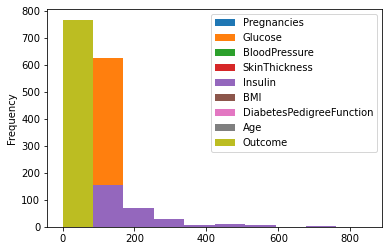

In [3]:
#LOADING THE DATA
data= load_data("diabetes.csv")

#visualize the data
data.plot.hist();

In [4]:
#CHARACTERISTICS OF THE DATA
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# EXTRACTING FEATURES NAME AND SHAPE OF THE DATAFRAME
features = data.keys().to_list()
total,c = data.shape

print(f"The shape of the dataset is {total,c} and the features are {features}")

The shape of the dataset is (768, 9) and the features are ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [6]:
# SCALING THE OUTCOME TO {-1,+1} AND STANDARDIZE THE REMAINING FEATURES
# +1 = PATIENT IS DIABETIC
# -1 = PATIENT DOESN'T HAVE DIABETIES

#SPLITING THE DATASET INTO TRAINING AND TESTING DATA
def split_and_standardise_data(data,features,ratio = 0.8):
    r,c = data.shape
    ratio = math.floor(r*ratio)
    
    #STANDARDIZE THE FEATURES EXCEPT THE OUTCOME
    for i in features[:-1]:
        # FINDING THE STANDARD DEVIATION AND MEAN OF THE TRAINING DATA
        std =data[i][:ratio].std()
        mean = data[i][:ratio].mean()
        #USING THE MEAN AND STANDARD DEVIATION OF THE TRAINING DATA TO STANDARDIZE THE WHOLE DATASET EXCEPT THE OUTCOME
        data[i]=(data[i]-mean)/std
        
    #SCALE THE OUTCOME TO {-1,+1}
    data.loc[(data[features[-1]] ==0)] = -1
    
    #SPLIT THE DATASET INTO TRAINING AND TESTING DATA
    training_data = data.iloc[:ratio].to_numpy()
    testing_data = data.iloc[ratio:].to_numpy()
    
    #DATA DISTRIBUTION VISUALIZATION
    total_positive_count = np.sum(data[features[-1]]==1)
    train_positive_count = np.sum(data.iloc[:ratio][features[-1]]==1)
    test_positive_count = np.sum(data.iloc[ratio:][features[-1]]==1)
    
    return training_data,testing_data,total_positive_count,train_positive_count,test_positive_count


In [7]:
# SIGN FUNCTION : ACTIVATION FUNCTION TO PREDICT THE OUTCOME


def sign(x):
    return 1 if x>0 else -1


# 2. TRAINING AND TESTING THE MODEL

In [8]:
# TRAINS THE MODEL: WEIGHT AND BIAS AND RETURNS IT
def train_model(t_data,learning_rate=0.001,bias =0):
    
    #INITIALIZING THE RANDOM VALUE FOR WEIGHT CORRESPONDING TO EACH INDPENDENT FEATURE
    wt_crit = np.random.RandomState(seed=123)
    wt = wt_crit.uniform(low=0.0, high=1.0, size=(1, 8))
    iteri,c =t_data.shape 
    
    #ITERATING OVER THE TRAINING DATA TO UPDATE OR TRAIN THE WEIGHT AND BIAS
    for i in range(iteri):
        di= np.array(t_data[i,:8])
        score = np.matmul(wt,di)+bias
        pred = sign(score)
        exp = t_data[i,8]
        #UPDATING THE WEIGHT AND BIAS
        wt = wt+ (exp-pred)*di*learning_rate
        bias = bias + (exp-pred)*learning_rate
        
    return wt,bias

In [9]:
# TESTS THE ACCURACY OF THE ACQUIRED FUNCTION AND RETURNS THE ACCURACY IN %
def test_model(t_data,wt,bias):
    iteri,c =t_data.shape 
    
    #VARIABLE TO HOLD TOTAL NUMBER OF RIGHT PREDICTION
    acc=0
    
    #ITERATING OVER THE TESTING DATA
    for i in range(iteri):
        datai= np.array(t_data[i,:8])
        score= np.matmul(wt,datai)+bias
        
        #USING THE SIGN FUNCTION TO PREDICT THE OUTCOME USING THE SCORE
        pred = sign(score)
        exp = t_data[i,8]
        
        #UPDATING THE NUMBER OF TOTAL RIGHT PREDICTION
        if pred==exp:
            acc+=1
    return round(100*acc/iteri,5)

In [10]:
# PREDICT THE OUTCOME USING ON THE INPUT FEATURES AND LEARNED WEIGHT AND BIAS
# RETURNS THE PREDICTION {+1,-1} USING THE SIGN FUNCTION 
def predict(data,wt,bias):
    datai= np.array(data[i,:8])
    score = np.matmul(wt,datai)+bias
    pred = sign(score)
    return pred

## EXPERIMENT 1
### DATA RATIO = 8:2 :: Training data: Testing data

In [11]:
# LIST OF LEASRNING_RATE FOR COMPARING THE ACCURACY
learning_rate_list=[0.0001,0.001,0.01,0.1]

#LIST TO HOLD THE ACCURACY FOR THE CORRESPONDING LEARNING_RATE FOR EXPERIMENT 1
accuracy_list_exp1=[]

In [12]:
# TRAINING AND TESTING DATA DIVIDED IN THE RATIO OF 8:2
training_data_exp1, testing_data_exp1,total_positive_count,train_positive_count_exp1,test_positive_count_exp1 = split_and_standardise_data(data,features,ratio=0.8)
print(f"Size of training data{training_data_exp1.shape} and testing data {testing_data_exp1.shape}\n")

# VARIABLE TO HOLD EXPECTED POSITIVE OUTCOME IN TRAINING AND TESTING DATA FOR VISUALIZATION
training_data_size_exp1= training_data_exp1.shape[0]
testing_data_size_exp1= testing_data_exp1.shape[0]

Size of training data(614, 9) and testing data (154, 9)



In [13]:
#training the model
for l_r in learning_rate_list:
    wt,bias = train_model(training_data_exp1,learning_rate=l_r)
#     print(f"weight={wt}\nbias={bias}")
    #testing the model for accuracy
    accuracy_list_exp1.append(test_model(testing_data_exp1,wt,bias))
    print(f"Accuracy with the learning rate {l_r} is {accuracy_list_exp1[-1]}\n")

Accuracy with the learning rate 0.0001 is 89.61039

Accuracy with the learning rate 0.001 is 90.90909

Accuracy with the learning rate 0.01 is 97.4026

Accuracy with the learning rate 0.1 is 99.35065



# EXPERIMENT 2
### DATA RATIO = 7:3 :: Training data: Testing data

In [14]:
#LIST TO HOLD THE ACCURACY FOR THE CORRESPONDING LEARNING_RATE FOR EXPERIMENT 2
accuracy_list_exp2=[]

In [15]:

# TRAINING AND TESTING DATA DIVIDED IN THE RATIO OF 8:2
training_data_exp2, testing_data_exp2,total_positive_count,train_positive_count_exp2,test_positive_count_exp2 = split_and_standardise_data(data,features,ratio=0.7)
print(f"Size of training data{training_data_exp2.shape} and testing data {testing_data_exp2.shape}\n")

# VARIABLE TO HOLD EXPECTED POSITIVE OUTCOME IN TRAINING AND TESTING DATA FOR VISUALIZATION
training_data_size_exp2= training_data_exp2.shape[0]
testing_data_size_exp2= testing_data_exp2.shape[0]


Size of training data(537, 9) and testing data (231, 9)



In [16]:
#training the model
for l_r in learning_rate_list:
    wt,bias = train_model(training_data_exp2,learning_rate=l_r)
#     print(f"weight={wt}\nbias={bias}")

    # CALCULATING THE MODEL'S ACCURACY WITH THE TESTINGD DATA
    accuracy_list_exp2.append(test_model(testing_data_exp2,wt,bias))
    print(f"Accuracy with the learning rate {l_r} is {accuracy_list_exp2[-1]}\n")

Accuracy with the learning rate 0.0001 is 98.7013

Accuracy with the learning rate 0.001 is 98.7013

Accuracy with the learning rate 0.01 is 98.7013

Accuracy with the learning rate 0.1 is 99.5671



# USING THE SKLEARN TO FIND A GENERAL FUNCTION BASED ON THE SAME DATASET TO COMPARE THE ACCURACY WITH OUR MODEL


In [17]:
# using sklearn perception method implementation to compare our result
from sklearn.linear_model import Perceptron

# LIST TO HOLD THE ACCURACY OF THE SKLEARN FOR DIFFERENT LEARNING_RATE
accuracy_list_sklearn_exp1=[]

# EXPERIMENT 1 - SCENARIO
for l_r in learning_rate_list:
    clf = Perceptron(tol=l_r, random_state=0)
    clf.fit(training_data_exp1[:,:8], training_data_exp1[:,8])
    Perceptron()
    accuracy_list_sklearn_exp1.append(round(clf.score(testing_data_exp1[:,:8], testing_data_exp1[:,8])*100,5))

# LIST TO HOLD THE ACCURACY OF THE SKLEARN FOR DIFFERENT LEARNING_RATE
accuracy_list_sklearn_exp2=[]

#EXPERIMENT 2- SCENARIO
for l_r in learning_rate_list:
    clf = Perceptron(tol=l_r, random_state=0)
    clf.fit(training_data_exp2[:,:8], training_data_exp2[:,8])
    Perceptron()
    accuracy_list_sklearn_exp2.append(round(clf.score(testing_data_exp2[:,:8], testing_data_exp2[:,8])*100,5))
    

  ## <h1><center>VISUALIZATION OF THE ACCURACY OF THE EXPERIMENT 1 & 2 FOR DIFFERENT LEARNING_RATE</center></h1>
  

In [18]:
print(f"learning_rate_list \t\t{learning_rate_list}\n")

print("\t\tExperiment 1 Accuracy\n")
print(f"accuracy_list_exp1\t\t{accuracy_list_exp1}")
print(f"accuracy_list_sklearn_exp1\t{accuracy_list_sklearn_exp1}\n")

print("\t\tExperiment 2 Accuracy\n")
print(f"accuracy_list_exp2\t\t{accuracy_list_exp2}")
print(f"accuracy_list_sklearn_exp2\t{accuracy_list_sklearn_exp2}")

learning_rate_list 		[0.0001, 0.001, 0.01, 0.1]

		Experiment 1 Accuracy

accuracy_list_exp1		[89.61039, 90.90909, 97.4026, 99.35065]
accuracy_list_sklearn_exp1	[98.7013, 98.7013, 98.7013, 98.7013]

		Experiment 2 Accuracy

accuracy_list_exp2		[98.7013, 98.7013, 98.7013, 99.5671]
accuracy_list_sklearn_exp2	[99.5671, 99.5671, 99.5671, 99.5671]


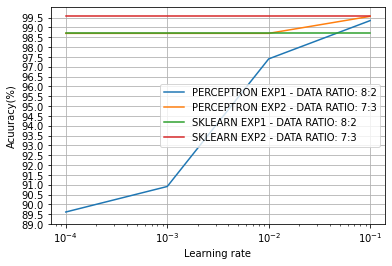

In [19]:
#PLOTING A LINE GRAPH TO VISUALIZE THE ACCURACY FOR DIFFERENT SITUATION
fig, ax = plt.subplots()

# FIGURE SIZE FOR THE PLOT
plt.rcParams["figure.figsize"] = (20,12)

# PLOTTING THE ACCURACY FOR THE CORRESPONDING LEARNING RATE FOR OUR MODEL EXPERIMENT 1 AND 2 
ax.semilogx(learning_rate_list, accuracy_list_exp1, label = "PERCEPTRON EXP1 - DATA RATIO: 8:2")
ax.semilogx(learning_rate_list, accuracy_list_exp2, label = "PERCEPTRON EXP2 - DATA RATIO: 7:3")

# PLOTTING THE ACCURACY FOR THE CORRESPONDING LEARNING RATE FOR SKLEARN EXPERIMENT 1 AND 2 
ax.semilogx(learning_rate_list, accuracy_list_sklearn_exp1, label = "SKLEARN EXP1 - DATA RATIO: 8:2")
ax.semilogx(learning_rate_list, accuracy_list_sklearn_exp2, label = "SKLEARN EXP2 - DATA RATIO: 7:3")
#plt.figure(figsize=(8, 6), dpi=80)
ax.grid()

#plt.xticks(np.arange(0.0001, 0.1, 0.005))
plt.yticks(np.arange(89, 100, 0.5))
plt.xlabel("Learning rate")
plt.ylabel("Acuuracy(%)")
plt.legend()
plt.show()

## <h1><center> Visualization of the Training and Testing data distribution after splitting</center></h1>

In [20]:
N = 4                 # NUMBER OF DATA TO PLOT
ind = np.arange(N)    # the x locations for the DATA
width = 0.35          # WIDTH OF EACH BAR

#VARIABLE TO HOLD POSITIVE AND NEGATIVE OUTCOME IN THE TRAINING AND TESTING DATASET TO PLOT BAR GRAPH
Training = (train_positive_count_exp1,-(training_data_size_exp1-train_positive_count_exp1),\
train_positive_count_exp2,-(training_data_size_exp2-train_positive_count_exp2))

Testing = (test_positive_count_exp1,-(testing_data_size_exp1-test_positive_count_exp1),\
test_positive_count_exp2,-(testing_data_size_exp2-test_positive_count_exp2))
     
#====================================================================================================================
Training,Testing


((213, -401, 189, -348), (55, -99, 79, -152))

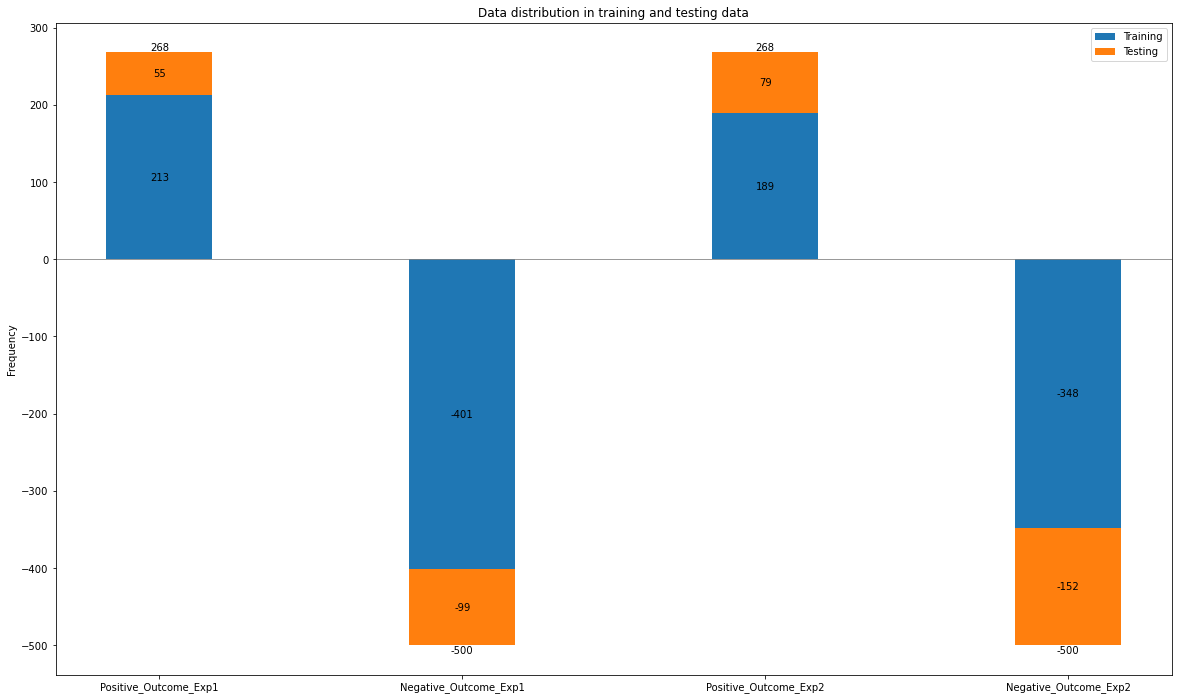

In [21]:
fig, ax = plt.subplots()

p1 = ax.bar(ind, Training, width, label='Training')
p2 = ax.bar(ind, Testing, width,bottom=Training, label='Testing')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Frequency')
ax.set_title('Data distribution in training and testing data')
ax.set_xticks(ind, labels=["Positive_Outcome_Exp1","Negative_Outcome_Exp1","Positive_Outcome_Exp2","Negative_Outcome_Exp2"])
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()